In [1]:
import itk
from matplotlib import pyplot as plt
import numpy as np
import pydicom

In [2]:
image = pydicom.read_file('/mnt/storage/Evidences/LEAL/series1/101.dcm')
# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(image.Rows), int(image.Columns))
ConstPixelSpacing = (float(image.PixelSpacing[0]), float(image.PixelSpacing[1]), float(image.SliceThickness))
ArrayDicom = np.zeros(ConstPixelDims, dtype=image.pixel_array.dtype)
ArrayDicom[:, :] = image.pixel_array 
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [3]:
min_image_value = np.amin(ArrayDicom)
max_image_value = np.amax(ArrayDicom)
min_max_range = max_image_value - min_image_value
windowed_image = ArrayDicom.copy()

for x in np.nditer(windowed_image, op_flags=['readwrite']):
    x[...] = 255*x/(min_max_range)

plt.imshow(windowed_image, interpolation='nearest')
plt.show()

In [30]:
inputImage = '/mnt/storage/Evidences/LEAL/series1/80.dcm'
outputImage = '/tmp/batata.png'
sigma = 1.0

PixelType = itk.F
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]

reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(inputImage)

gradientMagnitudeImageFilter = \
        itk.GradientMagnitudeRecursiveGaussianImageFilter.New(reader)
gradientMagnitudeImageFilter.SetInput(reader.GetOutput())
gradientMagnitudeImageFilter.SetSigma(sigma)

gradientMagnitudeImageFilter.Update()
#writer = itk.ImageFileWriter[ImageType].New()
#writer.SetFileName(outputImage)
#writer.SetInput(gradientMagnitudeImageFilter.GetOutput())

#writer.Update()

In [39]:
saiu = gradientMagnitudeImageFilter.GetOutput()
original = reader.GetOutput()

In [29]:
saiu.Update()


In [32]:
outra = itk.GetArrayFromImage(saiu)


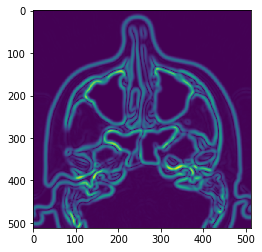

In [34]:
plt.imshow(outra)

In [47]:
copy_of_narray = outra.copy()
copy_of_narray.fill(0)
copy_of_narray[199,105]=1
copy_of_narray[199,115]=2
copy_of_narray[99,86]=2
copy_of_narray[199,305]=3
copy_of_narray[419,305]=4
de_volta_pra_itk = itk.GetImageFromArray(copy_of_narray)


In [89]:
itk.MorphologicalWatershedFromMarkersImageFilter

['GetTypes',
 'GetTypesAsList',
 'IF2ISS2',
 'IF2IUC2',
 'IF2IUS2',
 'IF3ISS3',
 'IF3IUC3',
 'IF3IUS3',
 'ISS2ISS2',
 'ISS2IUC2',
 'ISS2IUS2',
 'ISS3ISS3',
 'ISS3IUC3',
 'ISS3IUS3',
 'IUC2ISS2',
 'IUC2IUC2',
 'IUC2IUS2',
 'IUC3ISS3',
 'IUC3IUC3',
 'IUC3IUS3',
 'IUS2ISS2',
 'IUS2IUC2',
 'IUS2IUS2',
 'IUS3ISS3',
 'IUS3IUC3',
 'IUS3IUS3',
 'New',
 '_LoadModules',
 '_NewImageFileReader',
 '__add__',
 '__call__',
 '__class__',
 '__class_to_template__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__doxygen_root__',
 '__eq__',
 '__find_param__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__name__',
 '__named_templates__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__template__',
 '__templates__',
 '__weakref__',
 '_pixelTypeFromIO',
 'get',